In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os

os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
# The GPU id to use, "0" to  "7"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [4]:
import torch
import matplotlib.pyplot as plt

torch.manual_seed(1)

batch_size = 32
class_map = {
    'Airplane': 0,
    'Automobile': 1,
    'Bird': 2,
    'Cat': 3,
    'Deer': 4,
    'Dog': 5,
    'Frog': 6,
    'Horse': 7,
    'Ship': 8,
    'Truck': 9
}
show_summary = True
show_dataset_analyze = True

In [5]:
# Load Network and Print Summary
from cifar10.model import Net
from cifar10.utils import get_device, print_summary

# Check GPU availability
use_cuda, device = get_device()

if show_summary:
    model = Net(norm='ln').to(device)
    print_summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
         GroupNorm-2           [-1, 16, 32, 32]              32
            Conv2d-3           [-1, 16, 32, 32]           2,320
         GroupNorm-4           [-1, 16, 32, 32]              32
            Conv2d-5            [-1, 8, 32, 32]             136
         MaxPool2d-6            [-1, 8, 16, 16]               0
           Dropout-7            [-1, 8, 16, 16]               0
            Conv2d-8           [-1, 32, 16, 16]           2,336
         GroupNorm-9           [-1, 32, 16, 16]              64
           Conv2d-10           [-1, 32, 16, 16]           9,248
        GroupNorm-11           [-1, 32, 16, 16]              64
           Conv2d-12           [-1, 32, 16, 16]           9,248
        GroupNorm-13           [-1, 32, 16, 16]              64
           Conv2d-14           [-1, 16,

In [6]:
from cifar10.dataset import get_loader
from cifar10.transform import get_a_train_transform, get_a_test_transform

train_loader, test_loader = get_loader(get_a_train_transform(), get_a_test_transform(), batch_size=batch_size, use_cuda=use_cuda)

Files already downloaded and verified
Files already downloaded and verified


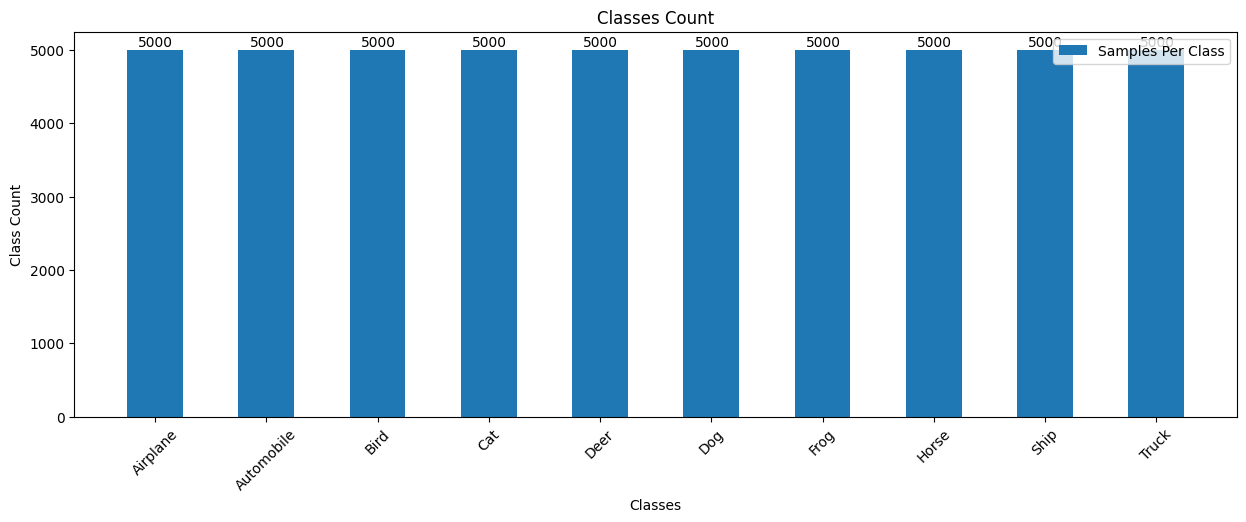

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

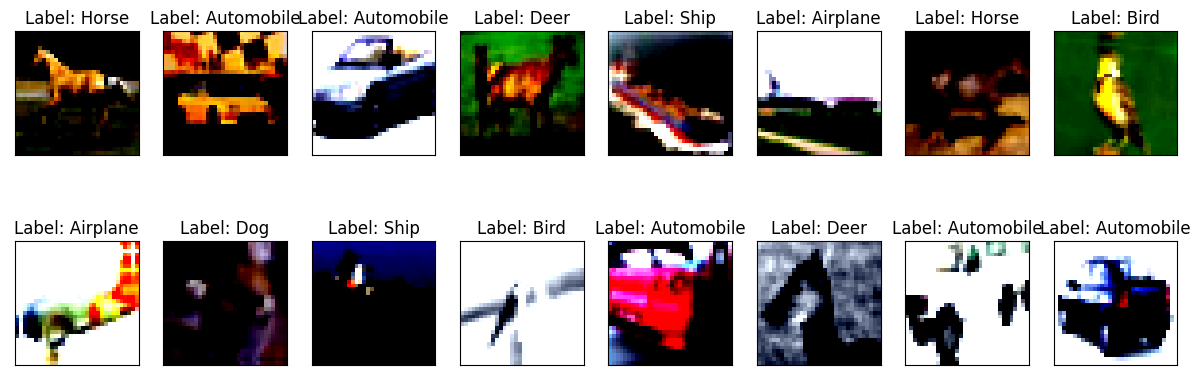

In [7]:
## Calculate Class Scale
from cifar10.visualize import print_class_scale, print_samples
if show_dataset_analyze:
    print_class_scale(train_loader, class_map)
    print_samples(train_loader, class_map)

In [8]:
import time
import math

from cifar10.backpropagation import train, test, get_sgd_optimizer
from cifar10.utils import initialize_weights
from cifar10.scheduler import one_cycle_lr_pt, one_cycle_lr_custom
from cifar10.training import Training

# Train Params
epochs = 20
lr = 0.001
max_lr = 0.01
steps_per_epoch = len(train_loader)
dropout = True
momentum = 0.9
weight_decay = 0

print("Using Device:", device)
print("Epochs:", epochs)
print("Lr:", lr)
print("Max Lr:", max_lr)
print("Batch Size:", batch_size)
print("Dropout:", dropout)
print("\n")

model = Net(norm='ln').apply(initialize_weights).to(device)
optimizer = get_sgd_optimizer(model, lr=lr)

# Pytorch one cycle scheduler
pytorch_scheduler = one_cycle_lr_pt(
    optimizer, 
    lr=lr, 
    max_lr=max_lr, 
    steps_per_epoch=steps_per_epoch, 
    epochs=epochs, 
    anneal_strategy='linear'
)

# One cycle schedule with a custom function
custom_scheduler = one_cycle_lr_custom(
    optimizer, 
    lr=lr, 
    max_lr=max_lr, 
    steps_per_epoch=steps_per_epoch, 
    epochs=epochs, 
    anneal_strategy='linear'
)

trainer = Training(
    model,
    optimizer,
    custom_scheduler,
    train(),
    test,
    train_loader,
    test_loader,
    lr,
    epochs,
    device,
    dropout
)

trainer.run()

Using Device: cuda
Epochs: 20
Lr: 0.001
Max Lr: 0.01
Batch Size: 32
Dropout: True


| Epoch | LR       | Time    | TrainLoss | TrainCorrect | TrainAcc | ValLoss  | ValCorrect | ValAcc |
|     1 | 0.001000 | 00m 35s | 1.833383  |        15217 | 30.43  % | 1.618933 |       3948 | 39.48% |
|     2 | 0.005500 | 00m 37s | 1.593529  |        20232 | 40.46  % | 1.378137 |       4893 | 48.93% |
|     3 | 0.010000 | 00m 37s | 1.382353  |        24704 | 49.41  % | 1.189885 |       5704 | 57.04% |
|     4 | 0.008367 | 892m 19s | 1.178095  |        28652 | 57.3   % | 1.101909 |       5954 | 59.54% |
|     5 | 0.006733 | 00m 42s | 1.066446  |        30910 | 61.82  % | 0.975471 |       6467 | 64.67% |
|     6 | 0.005100 | 00m 35s | 0.97566   |        32605 | 65.21  % | 0.915211 |       6704 | 67.04% |
|     7 | 0.003467 | 00m 34s | 0.903381  |        33904 | 67.81  % | 0.866004 |       6877 | 68.77% |
|     8 | 0.001833 | 00m 36s | 0.843428  |        34969 | 69.94  % | 0.852506 |       6947 | 69.47%

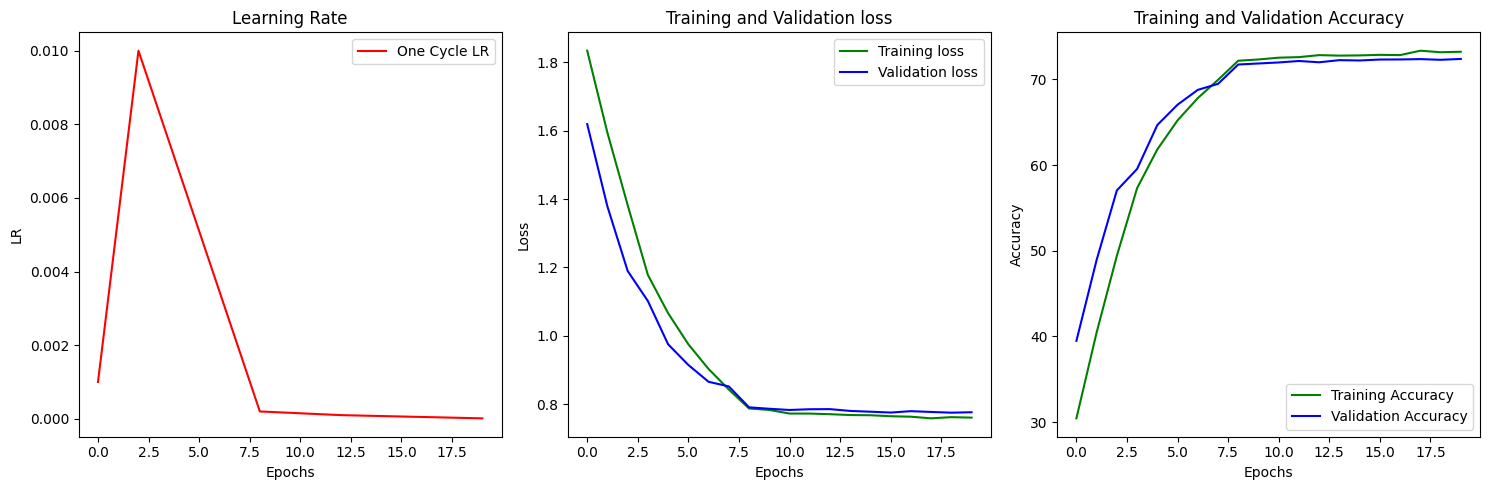

In [9]:
from cifar10.visualize import plot_network_performance

# trainer.print_best_model()
plot_network_performance(epochs, trainer.schedule, trainer.list_train_loss, trainer.list_valid_loss, trainer.list_train_correct, trainer.list_valid_correct)

Confusion matrix, without normalization


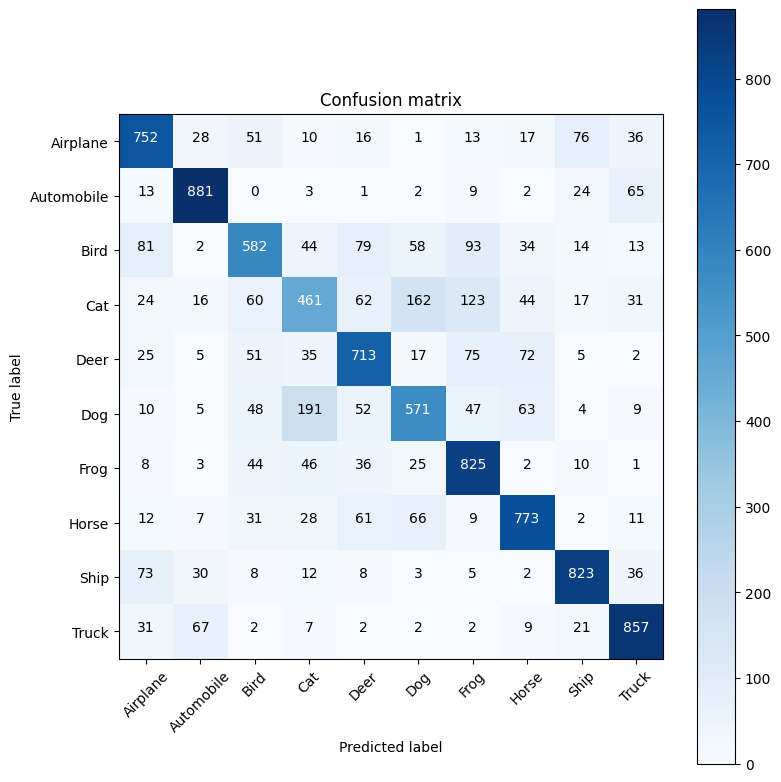

In [10]:
from cifar10.utils import get_all_predictions, get_incorrrect_predictions, prepare_confusion_matrix
from cifar10.visualize import plot_confusion_matrix

all_preds, all_targets = get_all_predictions(model, test_loader, device)
confusion_matrix = prepare_confusion_matrix(all_preds, all_targets, class_map)
plot_confusion_matrix(confusion_matrix, class_map, False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Total Incorrect Predictions 2762


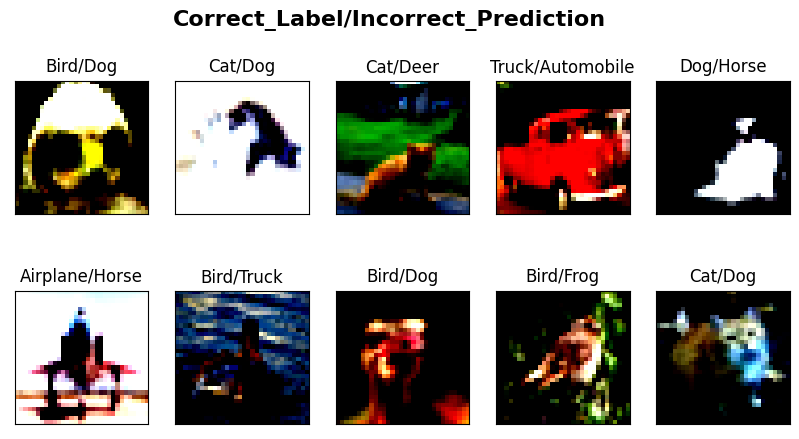

In [11]:
from cifar10.utils import get_incorrrect_predictions
from cifar10.visualize import plot_incorrect_predictions

incorrect = get_incorrrect_predictions(model, test_loader, device)
plot_incorrect_predictions(incorrect, class_map)